In [2]:
from langgraph.graph import StateGraph, START, END
from langchain_core.prompts import PromptTemplate
from langchain_openai import ChatOpenAI
from dotenv import load_dotenv
from typing import TypedDict


e:\Internships\langgraph\myvenv\Lib\site-packages\langchain_core\_api\deprecation.py:26: UserWarning: Core Pydantic V1 functionality isn't compatible with Python 3.14 or greater.
  from pydantic.v1.fields import FieldInfo as FieldInfoV1


In [3]:
load_dotenv()

True

In [4]:
model=ChatOpenAI()

In [5]:
class BlogState(TypedDict):
    title: str
    outline: str
    content: str

In [6]:
def create_outline(state: BlogState)-> BlogState:
    title=state['title']
    prompt=PromptTemplate(template="Generate the detailed outline for a blog on the topic- {title}",
                          input_variables=['title'])
    final_prompt=prompt.format(title=state['title'])
    response=model.invoke(final_prompt)
    state['outline']=response.content
    return state

In [7]:
def create_blog(state: BlogState)->BlogState:
    title=state['title']
    outline=state['outline']
    prompt=PromptTemplate(template="Write a detail blog on the title {title} using the following outline {outline}",
                          input_variables=['title','outline'])
    final_prompt=prompt.format(title=state['title'],
                               outline=state['outline'])
    response=model.invoke(final_prompt)
    state['content']=response.content
    return state

In [8]:
# Define graph
graph=StateGraph(BlogState)
# Add node 
graph.add_node('create_outline',create_outline)
graph.add_node('create_blog',create_blog)
# Add edges
graph.add_edge(START, 'create_outline')
graph.add_edge('create_outline','create_blog')
graph.add_edge('create_blog',END)
workflow=graph.compile()



In [12]:
initial_state={'title':'rise of ai in pakistan'}
final_state=workflow.invoke(initial_state)
print(final_state['content'])

The Rise of AI in Pakistan

I. Introduction

A. Artificial Intelligence (AI) refers to the simulation of human intelligence processes by machines, typically through algorithms and data. It has various applications such as natural language processing, machine learning, computer vision, and more.
B. Pakistan has seen a growing interest and adoption of AI technologies in recent years, with various sectors exploring its potential benefits.
C. The significance of AI in Pakistan lies in its ability to drive innovation, improve efficiency, and solve complex problems in sectors such as healthcare, agriculture, finance, and education.

II. History of AI in Pakistan

A. Pakistan has been an early adopter of AI technologies, especially in academia and research institutions. Various universities have been conducting research in AI for decades.
B. The growth and development of AI in Pakistan can be seen in sectors such as healthcare, where AI is being used for disease diagnosis and treatment planni

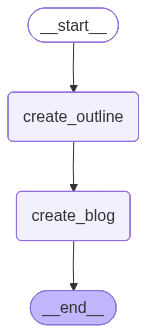

In [10]:
from IPython.display import Image
Image(workflow.get_graph().draw_mermaid_png())